# Preamble

In [9]:
import sys
#sys.path.insert(0, dir_notebook)

from my_units import *
from model_functions import * 
from load_functions import *
from yellin_functions import *

In [10]:
dir_home = '/mnt/home/kvantilburg/'
dir_ceph = dir_home+'ceph/LuminousBasin/'
dir_source = dir_ceph+'data/products_80610202001_orbit1_chu12_spatialARF/'
dir_events = dir_source+'event_lists/'
dir_production = dir_ceph+'data/production/'
dir_proj = dir_ceph+'yellin_projections/data/'

# Load Poisson Results

In [11]:
list_files_rho0 = np.sort([dir_proj+file for file in listdir(dir_proj) if file[0:4]=='rho0'])
list_files_proj = np.sort([dir_proj+file for file in listdir(dir_proj) if file[0:4]=='proj'])

In [12]:
df_results = pd.DataFrame(columns=['m','ra_sun_0','dec_sun_0','rho_0','N_data',
                                   'N_sig_lim_poisson','S_0_lim_poisson','N_sig_lim_yellin','S_0_lim_yellin'])
for i,file in enumerate(tqdm(list_files_rho0[:])):
    df_tmp1 = pd.read_csv(file)
    N_data = len(pd.read_csv(list_files_proj[i]))
    N_sig_lim = poisson_limit(N_data)
    S_0_lim = N_sig_lim/df_tmp1['rho_0'][0]
    df_tmp1.insert(0,'N_data',N_data)
    df_tmp1.insert(0,'N_sig_lim_poisson',N_sig_lim)
    df_tmp1.insert(0,'S_0_lim_poisson',S_0_lim)
    df_results = pd.concat([df_results,df_tmp1],ignore_index=True)
df_results.sort_values(by='m',inplace=True,ignore_index=True)

100%|██████████| 368/368 [00:10<00:00, 34.53it/s]


In [13]:
df_results

,m,ra_sun_0,dec_sun_0,rho_0,N_data,N_sig_lim_poisson,S_0_lim_poisson,N_sig_lim_yellin,S_0_lim_yellin
0,3.2,2.978728,0.070178,296.513448,12721,12864.742387,43.386708,NaN,NaN
1,3.3,2.978728,0.070178,398.950885,13348,13495.882921,33.828432,NaN,NaN
2,3.4,2.978728,0.070178,514.408935,13930,14079.962107,27.371146,NaN,NaN
3,3.5,2.978728,0.070178,645.655228,14995,15151.017660,23.466112,NaN,NaN
4,3.6,2.978728,0.070178,785.449821,15448,15607.089944,19.870257,NaN,NaN
...,...,...,...,...,...,...,...,...,...
363,39.5,2.978728,0.070178,25392.314178,9,14.204028,0.000559,NaN,NaN
364,39.6,2.978728,0.070178,25307.006674,9,14.204028,0.000561,NaN,NaN
365,39.7,2.978728,0.070178,25218.871552,9,14.204028,0.000563,NaN,NaN
366,39.8,2.978728,0.070178,25089.057583,9,14.204028,0.000566,NaN,NaN


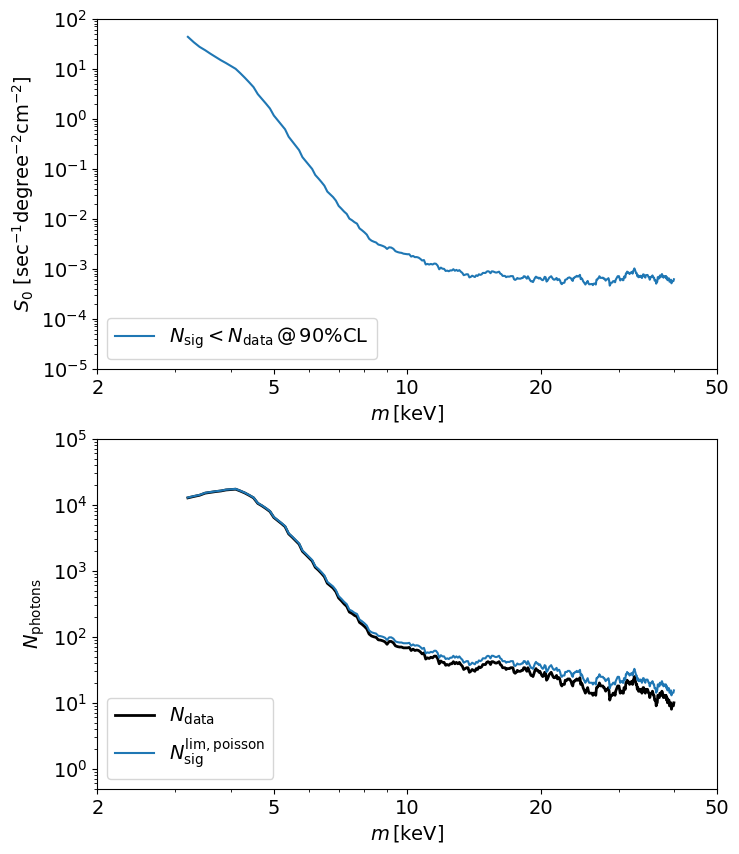

In [14]:
fig,ax = plt.subplots(2,1,figsize=(8,10))
ax[0].plot(df_results['m'],df_results['S_0_lim_poisson'],label=r'$N_\mathrm{sig} < N_\mathrm{data} \, @ \, 90\%\mathrm{CL}$')
ax[0].set_xlim(2,50); ax[0].set_ylim(1e-5,1e2);
ax[0].set_xscale('log'); ax[0].set_yscale('log'); ax[0].set_xlabel(r'$m \, [\mathrm{keV}]$'); ax[0].set_ylabel(r'$S_0~\mathrm{[sec^{-1} degree^{-2} cm^{-2}]}$'); 
ax[0].legend(loc='lower left');
ax[0].set_xticks([2,5,10,20,50],minor=False)
ax[0].set_xticklabels([2,5,10,20,50]);
ax[1].plot(df_results['m'],df_results['N_data'],lw=2,color='black',label=r'$N_\mathrm{data}$')
ax[1].plot(df_results['m'],df_results['N_sig_lim_poisson'],label=r'$N_\mathrm{sig}^\mathrm{lim,poisson}$')
ax[1].set_xlim(2,50); ax[1].set_ylim(5e-1,1e5);
ax[1].set_xscale('log'); ax[1].set_yscale('log'); ax[1].set_xlabel(r'$m \, [\mathrm{keV}]$'); ax[1].set_ylabel(r'$N_\mathrm{photons}$'); 
ax[1].legend(loc='lower left');
ax[1].set_xticks([2,5,10,20,50],minor=False)
ax[1].set_xticklabels([2,5,10,20,50]);